In [21]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [22]:
test_data = pd.read_csv('test.csv') 
train_data = pd.read_csv('train.csv')
test_data['PorchArea']  = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch']
train_data['PorchArea'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch']

In [23]:
y_test = pd.DataFrame(np.zeros(1459,))
X_test = test_data.loc[:, ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'PorchArea']]
y_train = train_data['SalePrice']
X_train = train_data.loc[:, ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'PorchArea']]

In [24]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [25]:
for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.5034246575342466, 0.0]
3 : [0.34726027397260273, 0.0]
4 : [0.26986301369863014, 0.0]
5 : [0.2095890410958904, 0.0]
6 : [0.18493150684931506, 0.0]
7 : [0.1643835616438356, 0.0]
8 : [0.14794520547945206, 0.0]
9 : [0.13219178082191782, 0.0]
10 : [0.1184931506849315, 0.0]
11 : [0.11164383561643836, 0.0]
12 : [0.10821917808219178, 0.0]
13 : [0.10684931506849316, 0.0]
14 : [0.10342465753424658, 0.0]
15 : [0.10410958904109589, 0.0]
16 : [0.09863013698630137, 0.0]
17 : [0.0958904109589041, 0.0]
18 : [0.09315068493150686, 0.0]
19 : [0.08767123287671233, 0.0]
20 : [0.08287671232876713, 0.0]


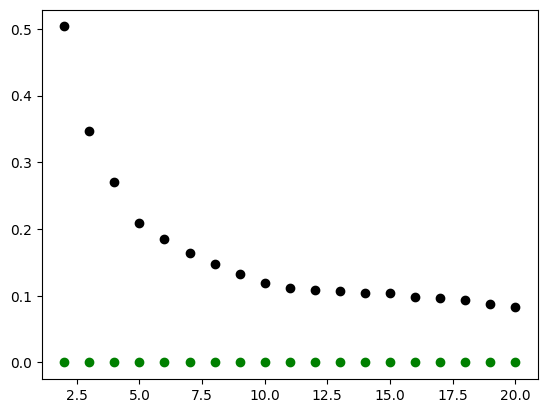

In [26]:
plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.show()

In [27]:
import gradio as gr

def Predict_Price(LotArea, OverallQual, OverallCond, GrLivArea, PorchArea):
    data = [LotArea, OverallQual, OverallCond, GrLivArea, PorchArea]
    user_data = pd.DataFrame([data])
    return clf.predict(user_data)

demo = gr.Interface(
    fn=Predict_Price,
    inputs=["text", "text", "text", "text", "text"],
    outputs=["text"],
)

demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
